# Clustering drills

Welcome, traveller, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [pokemon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

in the example, we wanted to determine the **most physically diverse** [pokemon](./assets/pokemon.csv) team there is. To do so, we clustered the pokemon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The pokemon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the pokemon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualise these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar pokemon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** pokemon groups from which you can determine your pokemon team similar to the method described in the example.

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster 
import seaborn as sns
import scipy.cluster.hierarchy as sch

%matplotlib inline

pokemon = pd.read_csv("pokemon.csv")

pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [156]:
# check number of invalid metric entries
print(pokemon['weight_kg'].isnull().sum())
print(pokemon['height_m'].isnull().sum())
print(pokemon['speed'].isnull().sum())
print(pokemon['hp'].isnull().sum())
print(pokemon['attack'].isnull().sum())
print(pokemon['defense'].isnull().sum())

20
20
0
0
0
0


In [157]:
#drop rows containing null values for weight or heigt

pokemon = pokemon.dropna(axis=0, subset=['weight_kg'])
pokemon = pokemon.dropna(axis=0, subset=['height_m'])

In [158]:
#adjusting index
pokemon = pokemon.reset_index(drop=True)

In [159]:
from sklearn.cluster import KMeans

# number of pokemon clusters
team_size = 6


# make new dataframe with relevant metrics


pokemon_metrics = pokemon[['defense','weight_kg','height_m','hp','speed', 'attack']]

# z-score standardization
pokemon_standardized = (pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_standardized = pokemon_standardized.rename(columns={'weight_kg': 'weight_zscore','height_m':'height_zscore', 'hp': 'hp_zscore', 'attack':'attack_zscore', 'defense': 'defense_zscore', 'speed':'speed_zscore'})

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_standardized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_standardized = pokemon_standardized.join(cluster_labels.to_frame())
pokemon_standardized


,defense_zscore,weight_zscore,height_zscore,hp_zscore,speed_zscore,attack_zscore,cluster
0,-0.779152,-0.498178,-0.429400,-0.907100,-0.736195,-0.890461,0
1,-0.324695,-0.442396,-0.151706,-0.343650,-0.217239,-0.487032,0
2,1.622977,0.353180,0.773940,0.407618,0.474702,0.692223,1
3,-0.973919,-0.483546,-0.521965,-1.132480,-0.044254,-0.797362,0
4,-0.487001,-0.387529,-0.059142,-0.418776,0.474702,-0.424966,0
...,...,...,...,...,...,...,...
776,0.973753,8.582359,7.438593,1.046195,-0.182642,0.723256,5
777,1.882666,-0.560361,-0.799659,-0.381213,1.478016,3.205898,2
778,-0.649307,7.559084,4.013702,5.779180,-0.805389,0.723256,5
779,0.908830,1.541971,1.144198,1.046195,0.440105,0.909454,3


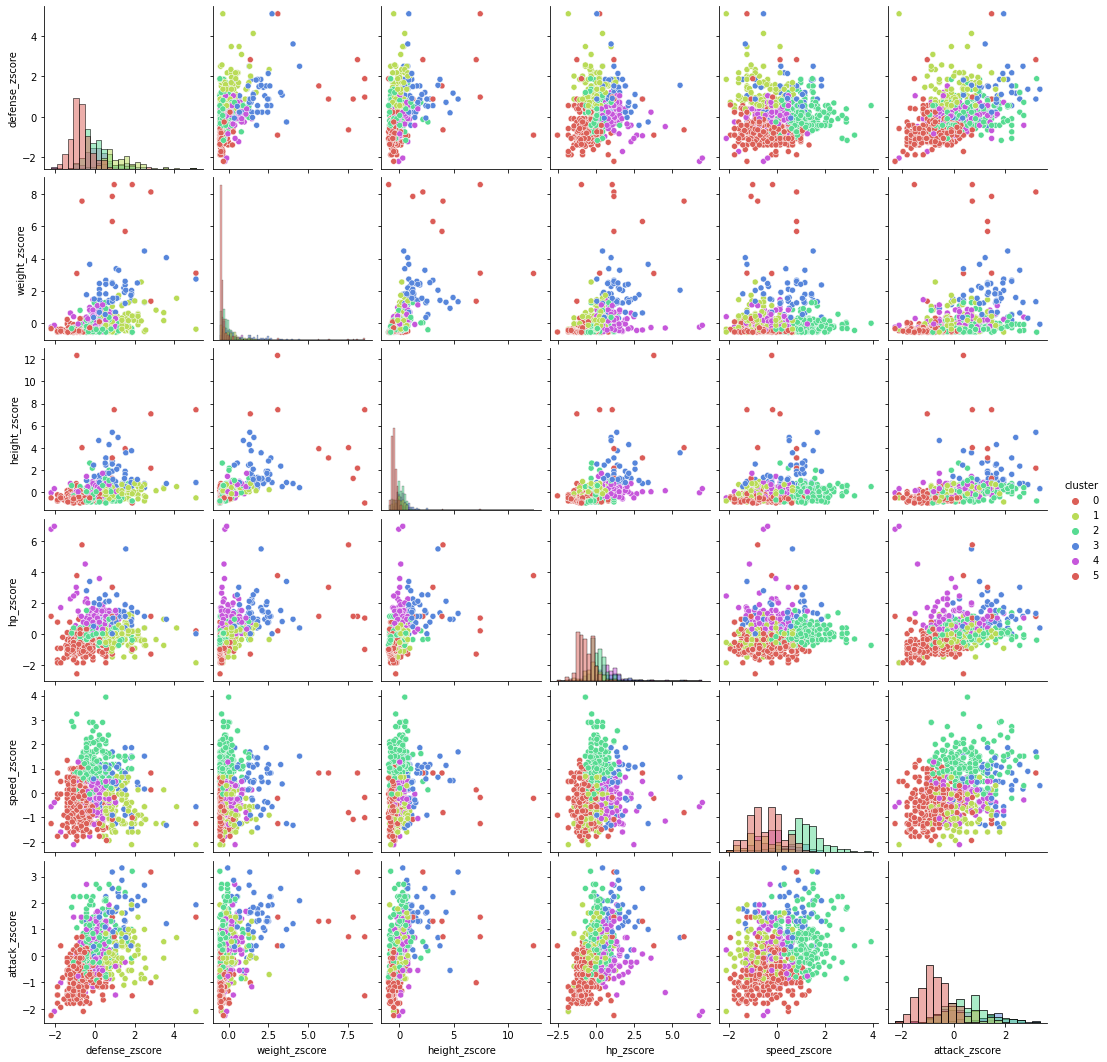

In [160]:
#visualisze your clusters here ( take a loot at the pandas scatter.matrix or seaborn's pairplot method)
import seaborn as sns

sns.pairplot(pokemon_standardized, hue='cluster', diag_kind='hist', palette = "hls")

## Using the elbow method to check the optimal number of 6 clusters

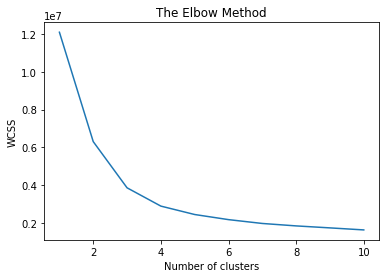

In [161]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pokemon_metrics)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [162]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pokemon_metrics)

print(y_kmeans)

[1 1 4 1 1 4 1 1 4 1 1 1 1 1 3 1 1 3 1 3 1 3 1 1 1 3 1 1 3 1 3 1 1 1 3 1 1
 3 1 1 1 3 1 4 1 3 1 4 1 3 3 1 1 3 1 4 4 1 1 3 1 3 3 4 1 4 1 3 1 1 4 4 4 1
 4 1 1 3 0 1 4 3 4 1 3 1 1 3 3 4 1 3 4 4 1 3 4 1 3 1 3 1 3 1 3 1 3 3 3 4 1
 0 0 1 1 3 3 3 1 1 3 1 3 3 2 3 3 3 1 3 0 4 3 1 1 4 1 1 4 1 3 4 1 3 1 1 1 1
 1 1 3 1 3 1 1 1 1 1 1 3 1 1 4 3 1 1 3 3 1 1 3 1 1 1 3 1 4 3 3 3 4 1 1 1 3
 1 4 1 3 2 1 3 3 4 1 4 3 1 4 1 1 1 4 1 1 3 1 0 3 1 3 4 1 4 3 3 1 1 3 1 1 1
 4 1 0 0 0 1 4 0 0 0 3 1 1 3 1 1 3 1 3 4 1 3 1 3 1 1 1 1 1 1 1 3 1 1 3 1 3
 1 1 1 1 3 1 1 1 3 1 3 4 1 3 1 1 1 4 1 0 1 4 1 3 1 3 4 4 2 1 3 1 3 1 1 3 1
 1 1 4 1 4 4 2 1 0 4 1 3 1 1 1 4 1 4 1 3 3 3 0 4 1 3 1 3 1 4 1 4 3 4 1 0 1
 1 1 3 1 1 4 1 3 1 1 0 1 4 4 1 3 3 3 1 1 4 4 4 0 2 0 0 0 3 3 2 5 0 3 3 1 4
 2 1 3 3 1 1 4 1 1 3 1 3 1 3 1 1 3 1 3 3 4 1 4 1 1 3 1 3 1 1 3 1 3 1 3 3 1
 3 1 3 3 3 1 3 1 1 3 1 0 1 1 1 1 4 1 3 4 4 1 3 1 2 1 3 1 3 3 1 3 1 1 4 3 0
 4 0 4 4 3 3 3 3 3 3 0 3 3 2 4 3 3 3 3 3 5 2 2 2 5 4 3 3 3 3 2 3 1 1 3 1 3
 4 1 1 4 1 3 1 1 3 1 3 1 

In [163]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10 , n_init = 10)
bgm.fit(pokemon_metrics)
np.round(bgm.weights_,2) 

array([0.4 , 0.  , 0.23, 0.02, 0.12, 0.14, 0.01, 0.03, 0.04, 0.  ])

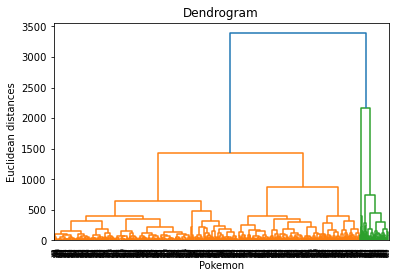

In [164]:
## Using the dendogram to check for optimal numb import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pokemon_metrics, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Pokemon')
plt.ylabel('Euclidean distances')
plt.show()

In [165]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pokemon_metrics)

print(y_hc)

[0 0 4 0 0 4 0 0 4 0 0 0 0 0 4 0 0 4 0 4 0 4 0 0 0 4 0 0 4 0 4 0 0 0 4 0 0
 0 0 0 0 0 0 4 0 4 0 3 0 0 4 0 0 4 0 4 3 0 0 4 0 4 0 4 0 3 0 0 0 0 4 0 3 0
 3 0 0 4 1 0 3 0 4 0 4 0 0 4 0 3 0 0 3 3 0 0 3 0 0 0 4 0 4 0 4 0 4 4 4 4 0
 1 1 0 0 0 0 4 0 0 0 0 4 4 5 4 4 4 0 0 1 3 4 0 0 3 0 0 4 0 0 3 0 4 0 4 0 0
 0 0 4 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 4 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 4
 0 3 0 4 5 0 4 4 3 0 4 4 0 3 0 0 0 4 0 0 4 0 1 4 0 4 3 0 3 4 4 0 0 0 0 0 0
 3 0 3 1 1 0 3 1 1 1 4 0 0 4 0 0 4 0 0 3 0 4 0 4 0 0 0 0 0 0 0 4 0 0 4 0 4
 0 0 0 0 4 0 0 0 4 0 4 3 0 4 0 0 0 3 0 1 0 3 0 4 0 0 0 3 5 0 4 0 4 0 0 0 0
 0 0 3 0 3 3 5 0 1 3 0 4 0 0 0 4 0 4 0 4 4 4 3 3 0 0 0 4 0 3 0 3 0 4 0 3 0
 0 0 4 0 0 3 0 4 0 0 1 0 3 3 0 0 0 0 0 0 3 3 3 1 5 1 1 1 4 4 1 2 1 4 4 0 3
 1 0 0 4 0 0 3 0 0 4 0 4 0 0 0 0 4 0 0 4 3 0 3 0 0 0 0 0 0 0 4 0 0 0 0 4 0
 0 0 4 0 4 0 4 0 0 4 0 1 0 0 0 0 3 0 4 3 3 0 4 0 1 0 4 0 4 4 0 0 0 0 3 4 1
 3 1 3 3 4 0 4 4 0 4 1 4 4 5 3 4 4 4 4 4 2 1 5 5 2 3 4 4 4 4 1 4 0 0 4 0 4
 3 0 0 3 0 0 0 0 4 0 4 0 

In [166]:
# determine your final pokemon here

import numpy as np        
        
def distance_to_other_clusters(pokemon):
    
   
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore'] ])
    
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
    
chosen_pokemon

,defense_zscore,weight_zscore,height_zscore,hp_zscore,speed_zscore,attack_zscore,cluster,dissimilarity,name
330,-1.720527,-0.493605,-0.521965,-1.846184,0.474702,-1.945584,0,27.621310,Feebas
194,5.096325,-0.373812,-0.521965,-1.846184,-2.120077,-2.100749,1,38.563981,Shuckle
777,1.882666,-0.560361,-0.799659,-0.381213,1.478016,3.205898,2,27.095725,Kartana
287,5.096325,2.730763,0.866504,0.031984,-0.563210,1.933544,3,34.139439,Aggron
94,-2.207445,-0.244874,-0.059142,6.793391,-0.563210,-2.255914,4,38.730847,Chansey
302,-0.908997,3.078255,12.344519,3.788321,-0.217239,0.381893,5,65.216821,Wailord


## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - manhattan distance
    - squared distance
    - 1/(squared distance)

In [167]:
# Assign dissimilarity to your pokemon here

## Manhatten distance

In [168]:
import numpy as np        
        
def manhattan_distance(pokemon):
    
   
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore'] ])
    
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += (np.abs(sum(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_standardized.apply(manhattan_distance, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon_2 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon_2 = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
    
chosen_pokemon_2

,defense_zscore,weight_zscore,height_zscore,hp_zscore,speed_zscore,attack_zscore,cluster,dissimilarity,name
330,-1.720527,-0.493605,-0.521965,-1.846184,0.474702,-1.945584,0,27.621310,Feebas
194,5.096325,-0.373812,-0.521965,-1.846184,-2.120077,-2.100749,1,38.563981,Shuckle
777,1.882666,-0.560361,-0.799659,-0.381213,1.478016,3.205898,2,27.095725,Kartana
287,5.096325,2.730763,0.866504,0.031984,-0.563210,1.933544,3,34.139439,Aggron
94,-2.207445,-0.244874,-0.059142,6.793391,-0.563210,-2.255914,4,38.730847,Chansey
302,-0.908997,3.078255,12.344519,3.788321,-0.217239,0.381893,5,65.216821,Wailord
776,0.973753,8.582359,7.438593,1.046195,-0.182642,0.723256,5,85.336226,Celesteela


## Squared distance

In [169]:
import numpy as np        
        
def Squared_distance(pokemon):
    
   
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore'] ])
    
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_standardized.apply(Squared_distance, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon_3 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon_3 = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
    
chosen_pokemon_3

,defense_zscore,weight_zscore,height_zscore,hp_zscore,speed_zscore,attack_zscore,cluster,dissimilarity,name
330,-1.720527,-0.493605,-0.521965,-1.846184,0.474702,-1.945584,0,27.621310,Feebas
194,5.096325,-0.373812,-0.521965,-1.846184,-2.120077,-2.100749,1,38.563981,Shuckle
777,1.882666,-0.560361,-0.799659,-0.381213,1.478016,3.205898,2,27.095725,Kartana
287,5.096325,2.730763,0.866504,0.031984,-0.563210,1.933544,3,34.139439,Aggron
94,-2.207445,-0.244874,-0.059142,6.793391,-0.563210,-2.255914,4,38.730847,Chansey
302,-0.908997,3.078255,12.344519,3.788321,-0.217239,0.381893,5,65.216821,Wailord
302,-0.908997,3.078255,12.344519,3.788321,-0.217239,0.381893,5,65.216821,Wailord


## 1/(squared distance)

In [170]:
def one_squared_distance(pokemon):
    
   
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'], pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore'] ])
    
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += 1/sum(np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_standardized.apply(one_squared_distance, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon_4 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon_4 = chosen_pokemon_4.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
    
chosen_pokemon_4

,defense_zscore,weight_zscore,height_zscore,hp_zscore,speed_zscore,attack_zscore,cluster,dissimilarity,name
488,-0.259773,-0.426850,-0.244271,-0.155833,-0.217239,0.071563,0,1.368563,Herdier
767,1.363287,-0.367411,0.125987,0.031984,0.647687,-0.083602,1,3.231435,Tapu Fini
592,-0.097467,-0.232071,-0.151706,-0.118269,0.024940,1.219785,2,4.732433,Fraxure
701,1.525593,1.221912,0.496246,0.407618,0.128731,1.002554,3,0.772623,Volcanion
228,-0.097467,0.828696,0.033423,0.031984,-0.528613,0.195695,4,1.391263,Pupitar
464,1.525593,5.684452,3.921137,1.158885,0.820672,1.312884,5,0.111682,Dialga


Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse pokémon team** possible...or is it?

We have clustered our pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **pokémon type**?

Some of the chosen pokémon may have the same type, as this data was ignored during clustering? But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the pokémon into 6 groups according to similar:
    - weight
    - height
    - primary pokémon type
    - secondary pokémon type
- determine the most dissimilar pokemon team from these clusters

But wait, these pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 pokémon types, and pokémon can only have one type. Vectorising a **grass**, **fire**, and **water** pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

In [171]:
pokemon_type = pokemon[['weight_kg','height_m','hp','type1', 'type2']]
pokemon_type

,weight_kg,height_m,hp,type1,type2
0,6.9,0.7,45,grass,poison
1,13.0,1.0,60,grass,poison
2,100.0,2.0,80,grass,poison
3,8.5,0.6,39,fire,NaN
4,19.0,1.1,58,fire,NaN
...,...,...,...,...,...
776,999.9,9.2,97,steel,flying
777,0.1,0.3,59,grass,steel
778,888.0,5.5,223,dark,dragon
779,230.0,2.4,97,psychic,NaN


In [172]:
print(pokemon_type['weight_kg'].isnull().sum())
print(pokemon_type['height_m'].isnull().sum())
print(pokemon_type['type1'].isnull().sum())
print(pokemon_type['type2'].isnull().sum())

0
0
0
383


In [173]:
pokemon_type = pokemon_type.replace(np.nan, 'unknown', regex=True)
# pokemon_type

In [174]:
pokemon_standardized = (pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()

In [175]:
#check the find unique values across the the pokemon types 
print(pokemon_type['type1'].nunique())
print(pokemon_type['type2'].nunique())

18
19


In [176]:
# vectorize your pokémon type data here (there are modules that vectorize data)

pokemon_metric_2 = pokemon.loc[:,['weight_kg','height_m','hp','type1', 'type2']].values

pokemon_metric_2

array([[6.9, 0.7, 45, 'grass', 'poison'],
       [13.0, 1.0, 60, 'grass', 'poison'],
       [100.0, 2.0, 80, 'grass', 'poison'],
       ...,
       [888.0, 5.5, 223, 'dark', 'dragon'],
       [230.0, 2.4, 97, 'psychic', nan],
       [80.5, 1.0, 80, 'steel', 'fairy']], dtype=object)

## Dummy variables

In [177]:
pokemon_dum = pd.get_dummies(pokemon_type, drop_first=False)
pokemon_dum

,weight_kg,height_m,hp,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,...,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_unknown,type2_water
0,6.9,0.7,45,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,13.0,1.0,60,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,100.0,2.0,80,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8.5,0.6,39,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,19.0,1.1,58,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,999.9,9.2,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0.1,0.3,59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
778,888.0,5.5,223,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,230.0,2.4,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [178]:
pokemon_dum.shape

# there are two colloms more than expexted 

(781, 40)

In [179]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
pokemon_dum_stadardized = pd.DataFrame(StandardScaler().fit_transform(pokemon_dum[['weight_kg','height_m']]))
pokemon_dum_stadardized = pokemon_dum_stadardized.rename(columns= {0 : 'weight_zscore', 1:'height_zscore'})
                                                                
pokemon_dum_stadardized

,weight_zscore,height_zscore
0,-0.498497,-0.429675
1,-0.442679,-0.151804
2,0.353406,0.774436
3,-0.483856,-0.522299
4,-0.387777,-0.059180
...,...,...
776,8.587859,7.443360
777,-0.560720,-0.800171
778,7.563928,4.016274
779,1.542959,1.144932


In [180]:
pokemon_dum_stadardized_all = pokemon_dum_stadardized.join(pokemon_dum)

In [181]:
pokemon_dum_stadardized_all

,weight_zscore,height_zscore,weight_kg,height_m,hp,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,...,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_unknown,type2_water
0,-0.498497,-0.429675,6.9,0.7,45,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.442679,-0.151804,13.0,1.0,60,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.353406,0.774436,100.0,2.0,80,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.483856,-0.522299,8.5,0.6,39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.387777,-0.059180,19.0,1.1,58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,8.587859,7.443360,999.9,9.2,97,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,-0.560720,-0.800171,0.1,0.3,59,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
778,7.563928,4.016274,888.0,5.5,223,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,1.542959,1.144932,230.0,2.4,97,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [182]:
# pokemon_dum_stadardized_all = pokemon_dum_stadardized_all.drop(['weight_kg','height_m'], axis = 1)

In [183]:
# cluster your multi-dimensional pokémon data here

In [184]:
# fit a kmeans object to the dataset
kmeans_2 = KMeans(n_clusters=team_size, init = 'k-means++').fit(pokemon_dum_stadardized_all)

# cluster is attribute of the object
clustercenters2 = kmeans_2.cluster_centers_

# add cluster index to dataframe

cluster_labels = pd.Series(kmeans.labels_, name = 'clusters')
pokemon_dum_stadardized_all = pokemon_dum_stadardized_all.join(cluster_labels.to_frame())
pokemon_dum_stadardized_all

,weight_zscore,height_zscore,weight_kg,height_m,hp,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,...,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_unknown,type2_water,clusters
0,-0.498497,-0.429675,6.9,0.7,45,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.442679,-0.151804,13.0,1.0,60,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.353406,0.774436,100.0,2.0,80,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
3,-0.483856,-0.522299,8.5,0.6,39,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,-0.387777,-0.059180,19.0,1.1,58,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,8.587859,7.443360,999.9,9.2,97,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
777,-0.560720,-0.800171,0.1,0.3,59,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
778,7.563928,4.016274,888.0,5.5,223,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
779,1.542959,1.144932,230.0,2.4,97,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [185]:
# determine your unique team here

In [186]:
import numpy as np        
        
def manhattan_distance(pokemon):
    
   
    metric = np.array(pokemon_dum_stadardized_all[['weight_zscore', 'height_zscore']])
    
    cluster_number = round(pokemon_dum_stadardized_all['clusters'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += (np.abs(sum(metric - center))) # manhatten distance
        
    return distances

# evaluate all pokemon
pokemon_dissimilarity = pokemon_dum_stadardized_all.apply(manhattan_distance, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_dum_stadardized_all.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon_dum = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['clusters'] == cluster_index]
    chosen_pokemon_dum = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])
    
chosen_pokemon_dum

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

But wait, did you properly **normalize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example normalizes its data using the **z-score**. What does this mean? z-score or mean normalization means we are using our **problem space** where our data lives optimally. 

in the case of the pokemon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the euclidian distance between points of data would be larger.

For example, A pokemon weighing 200kg and measuring 4m is about **as similar** as another pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **pokémon types** into vectors of length one, the **euclidian distance** between one pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **pokémon type** matters more than **weight or height**?

In [ ]:
# normalize and scale your data in such a way that pokémon type similarity matters more than the other metrics

## Stats summary by type¶


## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this excercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every pokémon in a cluster to every other pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximising in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

In [ ]:
# compare your techniques here

## Hierarchical clustering¶


In [198]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=6, linkage='ward')

agg2 = agg.fit_predict(pokemon_dum_stadardized)

print(agg2)

[4 0 0 4 0 0 4 0 0 4 4 0 4 4 0 4 0 0 4 0 0 2 4 4 4 0 4 0 0 4 0 4 0 4 0 4 4
 0 4 0 0 0 4 0 4 0 4 0 4 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 4
 0 0 0 0 3 0 0 4 0 4 0 4 4 0 0 0 4 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0
 3 2 4 4 0 0 0 0 4 0 4 0 0 2 0 0 0 0 2 2 0 4 0 0 0 4 0 0 4 0 0 4 0 4 0 0 0
 4 0 0 4 0 4 4 4 4 4 4 0 4 4 0 4 4 0 0 0 4 4 4 4 4 4 0 4 0 0 0 4 0 4 4 0 0
 4 0 0 0 3 4 0 4 0 4 0 0 4 0 4 0 4 0 4 4 0 0 2 0 4 0 0 4 0 4 0 0 4 0 4 4 4
 0 0 0 2 2 0 0 2 3 2 4 4 0 0 4 0 0 4 4 0 4 0 4 4 4 4 0 4 0 4 0 0 4 0 0 4 4
 4 0 4 4 0 4 4 4 0 0 0 0 4 4 4 4 0 0 0 2 4 0 4 0 4 4 0 0 2 4 0 4 0 4 4 4 4
 4 4 0 4 0 0 5 4 2 0 4 0 0 4 0 0 0 0 4 0 0 2 0 0 4 0 4 0 4 0 0 0 4 0 4 3 4
 0 4 0 4 0 0 4 0 4 4 2 0 0 0 0 0 0 0 4 4 0 0 0 0 2 2 0 2 0 0 2 1 3 4 0 4 0
 2 4 0 0 4 0 0 4 4 0 4 0 4 0 4 0 0 4 0 0 0 0 0 4 4 0 4 0 4 4 0 4 4 4 0 0 4
 0 4 0 0 0 4 0 4 4 0 0 0 4 4 4 4 0 4 0 0 0 4 0 0 2 4 0 4 0 0 4 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 4 4 4 4 1 2 2 2 1 0 4 4 0 4 2 4 4 4 2 4 0
 0 4 0 0 4 0 4 0 0 4 0 4 

In [196]:
cluster_labels = pd.Series(agg.labels_, name='cluster_agg')
pokemon_dum_stadardized_2 = pokemon_dum_stadardized.join(cluster_labels.to_frame())
pokemon_dum_stadardized_2

,weight_zscore,height_zscore,cluster_agg
0,-0.498497,-0.429675,4
1,-0.442679,-0.151804,0
2,0.353406,0.774436,0
3,-0.483856,-0.522299,4
4,-0.387777,-0.059180,0
...,...,...,...
776,8.587859,7.443360,1
777,-0.560720,-0.800171,4
778,7.563928,4.016274,1
779,1.542959,1.144932,2


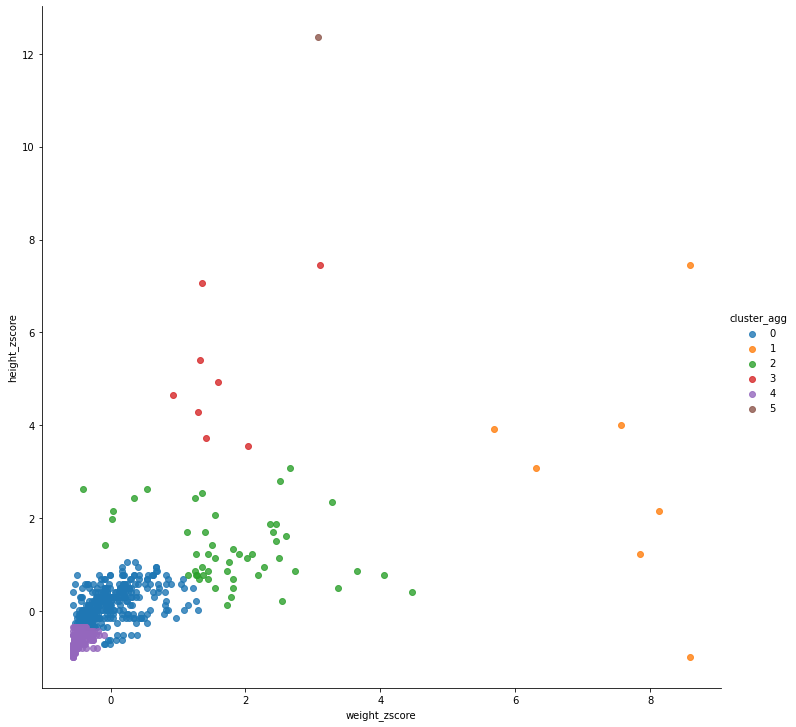

In [197]:
sns.lmplot(x='weight_zscore', y='height_zscore',  height=10, data=pokemon_dum_stadardized_2
           ,
           fit_reg=False, hue='cluster_agg')

## DBSCAN

In [204]:
x = pokemon.loc[:, ['height_m','weight_kg']]


In [205]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


x

,height_m,weight_kg
0,0.7,6.9
1,1.0,13.0
2,2.0,100.0
3,0.6,8.5
4,1.1,19.0
...,...,...
776,9.2,999.9
777,0.3,0.1
778,5.5,888.0
779,2.4,230.0


In [206]:
imputer.fit(x)


SimpleImputer()

In [207]:
x = imputer.transform(x)


In [209]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3,min_samples=4) # by default euclidean metric is used
model = dbscan.fit(x)
cls_centers = model.core_sample_indices_
labels = model.labels_

# labels


In [211]:
clust_lbl = pd.Series(model.labels_,name='cluster')
x


array([[7.00e-01, 6.90e+00],
       [1.00e+00, 1.30e+01],
       [2.00e+00, 1.00e+02],
       ...,
       [5.50e+00, 8.88e+02],
       [2.40e+00, 2.30e+02],
       [1.00e+00, 8.05e+01]])

In [212]:
y = pokemon[['height_m','weight_kg']].join(clust_lbl.to_frame())


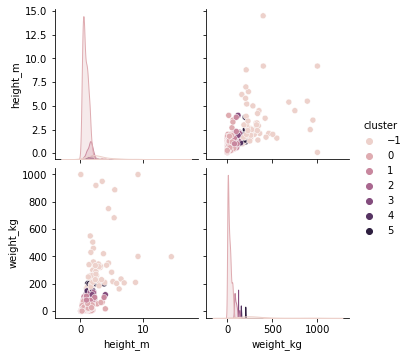

In [213]:
sns.pairplot(data=y,vars=['height_m','weight_kg'], hue='cluster')


## Birch

In [231]:
x = pokemon.loc[:, ['height_m','weight_kg']]


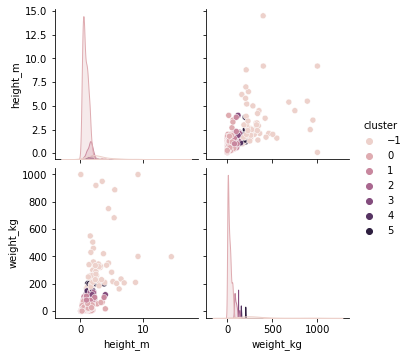

In [232]:
from sklearn.cluster import Birch

birch_labels = Birch(n_clusters=6).fit_predict(x)
x = pd.Series(birch_labels, name="cluster")
clust_lbl = pd.Series(model.labels_,name='cluster')

y = pokemon[['height_m','weight_kg']].join(clust_lbl.to_frame())

sns.pairplot(data=y,vars=['height_m','weight_kg'], hue='cluster')
